In [0]:
from pyspark.sql.functions import hour, avg
from pyspark.sql.functions import month, count, round, sum
from pyspark.sql.window import Window

In [0]:
# File location and type
file1 = "/FileStore/tables/fhvhv_tripdata_2021_01.parquet"
file2 = "/FileStore/tables/fhvhv_tripdata_2021_02.parquet"
file3 = "/FileStore/tables/fhvhv_tripdata_2021_03.parquet"
file4 = "/FileStore/tables/fhvhv_tripdata_2021_04.parquet"
file5 = "/FileStore/tables/fhvhv_tripdata_2021_05.parquet"
file6 = "/FileStore/tables/fhvhv_tripdata_2021_06.parquet"
file7 = "/FileStore/tables/fhvhv_tripdata_2021_07.parquet"
file8 = "/FileStore/tables/fhvhv_tripdata_2021_08.parquet"
file9 = "/FileStore/tables/fhvhv_tripdata_2021_09.parquet"
file10 = "/FileStore/tables/fhvhv_tripdata_2021_10.parquet"
file11 = "/FileStore/tables/fhvhv_tripdata_2021_11.parquet"
file12 = "/FileStore/tables/fhvhv_tripdata_2021_12.parquet"



file_type='parquet'
df1=spark.read.parquet(file1, header=True, inferSchema=True)
df2=spark.read.parquet(file2, header=True, inferSchema=True)
df3=spark.read.parquet(file3, header=True, inferSchema=True)
df4=spark.read.parquet(file4, header=True, inferSchema=True)
df5=spark.read.parquet(file5, header=True, inferSchema=True)
df6=spark.read.parquet(file6, header=True, inferSchema=True)
df7=spark.read.parquet(file7, header=True, inferSchema=True)
df8=spark.read.parquet(file8, header=True, inferSchema=True)
df9=spark.read.parquet(file9, header=True, inferSchema=True)
df10=spark.read.parquet(file10, header=True, inferSchema=True)
df11=spark.read.parquet(file11, header=True, inferSchema=True)
df12=spark.read.parquet(file12, header=True, inferSchema=True)

In [0]:
df1.show(truncate=False)

+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|request_datetime   |on_scene_datetime  |pickup_datetime    |dropoff_datetime   |PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls|bcf |sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+--

In [0]:
#combining all the 12 datasets into one dataframe
df_2021=df1.union(df2).union(df3).union(df4).union(df5).union(df6).union(df7).union(df8).union(df9).union(df10).union(df11).union(df12)

In [0]:
#combined dataframe with rows from all the 12 datasets
df_2021.show()

+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+--

In [0]:
print((df_2021.count(), len(df_2021.columns)))

(174596652, 24)


In [0]:
df_2021.printSchema()

root
 |-- hvfhs_license_num: string (nullable = true)
 |-- dispatching_base_num: string (nullable = true)
 |-- originating_base_num: string (nullable = true)
 |-- request_datetime: timestamp (nullable = true)
 |-- on_scene_datetime: timestamp (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- trip_time: long (nullable = true)
 |-- base_passenger_fare: double (nullable = true)
 |-- tolls: double (nullable = true)
 |-- bcf: double (nullable = true)
 |-- sales_tax: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)
 |-- tips: double (nullable = true)
 |-- driver_pay: double (nullable = true)
 |-- shared_request_flag: string (nullable = true)
 |-- shared_match_flag: string (nullable = true)
 |-- access_a_ride_flag: string (nul

2022 Files

In [0]:
# File locations and type
file2_1  = "/FileStore/tables/fhvhv_tripdata_2022_01.parquet"
file2_2  = "/FileStore/tables/fhvhv_tripdata_2022_02.parquet"
file2_3  = "/FileStore/tables/fhvhv_tripdata_2022_03.parquet"
file2_4  = "/FileStore/tables/fhvhv_tripdata_2022_04.parquet"
file2_5  = "/FileStore/tables/fhvhv_tripdata_2022_05.parquet"
file2_6  = "/FileStore/tables/fhvhv_tripdata_2022_06.parquet"
file2_7  = "/FileStore/tables/fhvhv_tripdata_2022_07.parquet"
file2_8  = "/FileStore/tables/fhvhv_tripdata_2022_08.parquet"
file2_9  = "/FileStore/tables/fhvhv_tripdata_2022_09.parquet"
file2_10  = "/FileStore/tables/fhvhv_tripdata_2022_10.parquet"
file2_11 = "/FileStore/tables/fhvhv_tripdata_2022_11.parquet"
file2_12 = "/FileStore/tables/fhvhv_tripdata_2022_12.parquet"
file_type = 'parquet'

# Read Parquet files into DataFrames
df1 = spark.read.parquet(file2_1, header=True, inferSchema=True)
df2 = spark.read.parquet(file2_2, header=True, inferSchema=True)
df3 = spark.read.parquet(file2_3, header=True, inferSchema=True)
df4 = spark.read.parquet(file2_4, header=True, inferSchema=True)
df5 = spark.read.parquet(file2_5, header=True, inferSchema=True)
df6 = spark.read.parquet(file2_6, header=True, inferSchema=True)
df7 = spark.read.parquet(file2_7, header=True, inferSchema=True)
df8 = spark.read.parquet(file2_8, header=True, inferSchema=True)
df9 = spark.read.parquet(file2_9, header=True, inferSchema=True)
df10 = spark.read.parquet(file2_10, header=True, inferSchema=True)
df11 = spark.read.parquet(file2_11, header=True, inferSchema=True)
df12 = spark.read.parquet(file2_12, header=True, inferSchema=True)

In [0]:
#combining all the 12 datasets into one dataframe
df_2022=df1.union(df2).union(df3).union(df4).union(df5).union(df6).union(df7).union(df8).union(df9).union(df10).union(df11).union(df12)

#combined dataframe with rows from all the 12 datasets
df_2022.show()

# shape of first dataframe is 11908468 rows and 24 columns.
print((df_2022.count(), len(df_2022.columns)))

df_2022.printSchema()

+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+--

Data Preprocessing

In [0]:
import pandas as pd

# Check the data types of each variable for 2021
print(df_2021.dtypes)
df_2021.show()

# Get descriptive statistics for numerical variables for 2021
print(df_2021[['trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay']].describe())

# Get descriptive statistics for numerical variables for 2022
print(df_2022[['trip_miles', 'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay']].describe())

#df_2021.show()

[('hvfhs_license_num', 'string'), ('dispatching_base_num', 'string'), ('originating_base_num', 'string'), ('request_datetime', 'timestamp'), ('on_scene_datetime', 'timestamp'), ('pickup_datetime', 'timestamp'), ('dropoff_datetime', 'timestamp'), ('PULocationID', 'bigint'), ('DOLocationID', 'bigint'), ('trip_miles', 'double'), ('trip_time', 'bigint'), ('base_passenger_fare', 'double'), ('tolls', 'double'), ('bcf', 'double'), ('sales_tax', 'double'), ('congestion_surcharge', 'double'), ('airport_fee', 'double'), ('tips', 'double'), ('driver_pay', 'double'), ('shared_request_flag', 'string'), ('shared_match_flag', 'string'), ('access_a_ride_flag', 'string'), ('wav_request_flag', 'string'), ('wav_match_flag', 'string')]
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+-------

In [0]:
from pyspark.sql import functions as F
from pyspark.sql.types import StringType, BooleanType, IntegerType, DoubleType

# Convert columns to appropriate data types
df_2021 = df_2021.withColumn("request_datetime", F.col("request_datetime").cast("timestamp"))
df_2021 = df_2021.withColumn("trip_miles", F.col("trip_miles").cast("double"))
df_2021 = df_2021.withColumn("trip_time", F.col("trip_time").cast("double"))

# Convert boolean columns to BooleanType
boolean_columns = ["shared_request_flag", "shared_match_flag", "access_a_ride_flag", "wav_request_flag", "wav_match_flag"]
for col_name in boolean_columns:
    df_2021 = df_2021.withColumn(col_name, F.col(col_name).cast(BooleanType()))

# Convert integer columns to IntegerType
integer_columns = ["PULocationID", "DOLocationID"]
for col_name in integer_columns:
    df_2021 = df_2021.withColumn(col_name, F.col(col_name).cast(IntegerType()))

# Convert other categorical columns to StringType
categorical_columns = ["hvfhs_license_num", "dispatching_base_num", "originating_base_num"]
for col_name in categorical_columns:
    df_2021 = df_2021.withColumn(col_name, F.col(col_name).cast(StringType()))

# Print the updated schema
df_2021.printSchema()

df_2021.show()

root
 |-- hvfhs_license_num: string (nullable = true)
 |-- dispatching_base_num: string (nullable = true)
 |-- originating_base_num: string (nullable = true)
 |-- request_datetime: timestamp (nullable = true)
 |-- on_scene_datetime: timestamp (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- trip_time: double (nullable = true)
 |-- base_passenger_fare: double (nullable = true)
 |-- tolls: double (nullable = true)
 |-- bcf: double (nullable = true)
 |-- sales_tax: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)
 |-- tips: double (nullable = true)
 |-- driver_pay: double (nullable = true)
 |-- shared_request_flag: boolean (nullable = true)
 |-- shared_match_flag: boolean (nullable = true)
 |-- access_a_ride_flag: b

In [0]:
from pyspark.sql import functions as F
from pyspark.sql.types import StringType, BooleanType, IntegerType, DoubleType

# Convert columns to appropriate data types
df_2022 = df_2022.withColumn("request_datetime", F.col("request_datetime").cast("timestamp"))
df_2022 = df_2022.withColumn("trip_miles", F.col("trip_miles").cast("double"))
df_2022 = df_2022.withColumn("trip_time", F.col("trip_time").cast("double"))

# Convert boolean columns to BooleanType
boolean_columns = ["shared_request_flag", "shared_match_flag", "access_a_ride_flag", "wav_request_flag", "wav_match_flag"]
for col_name in boolean_columns:
    df_2022 = df_2022.withColumn(col_name, F.col(col_name).cast(BooleanType()))

# Convert integer columns to IntegerType
integer_columns = ["PULocationID", "DOLocationID"]
for col_name in integer_columns:
    df_2022 = df_2022.withColumn(col_name, F.col(col_name).cast(IntegerType()))

# Convert other categorical columns to StringType
categorical_columns = ["hvfhs_license_num", "dispatching_base_num", "originating_base_num"]
for col_name in categorical_columns:
    df_2022 = df_2022.withColumn(col_name, F.col(col_name).cast(StringType()))

# Print the updated schema
df_2022.printSchema()

df_2022.show()

root
 |-- hvfhs_license_num: string (nullable = true)
 |-- dispatching_base_num: string (nullable = true)
 |-- originating_base_num: string (nullable = true)
 |-- request_datetime: timestamp (nullable = true)
 |-- on_scene_datetime: timestamp (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- trip_time: double (nullable = true)
 |-- base_passenger_fare: double (nullable = true)
 |-- tolls: double (nullable = true)
 |-- bcf: double (nullable = true)
 |-- sales_tax: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)
 |-- tips: double (nullable = true)
 |-- driver_pay: double (nullable = true)
 |-- shared_request_flag: boolean (nullable = true)
 |-- shared_match_flag: boolean (nullable = true)
 |-- access_a_ride_flag: b

In [0]:
from pyspark.sql.functions import col

# Define a function to remove outliers from a column using IQR
def remove_outliers(df, col_name):
    q1, q3 = df.approxQuantile(col_name, [0.25, 0.75], 0.05)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df.filter((col(col_name) >= lower_bound) & (col(col_name) <= upper_bound))

# Remove outliers from specific columns
columns_to_remove_outliers = ["trip_miles", "trip_time"]
for col_name in columns_to_remove_outliers:
    df_2021_no_outliers = remove_outliers(df_2021, col_name)

# Remove duplicate rows
df_2021_no_duplicates = df_2021_no_outliers.dropDuplicates()

In [0]:
# Remove outliers from specific columns
columns_to_remove_outliers = ["trip_miles", "trip_time"]
for col_name in columns_to_remove_outliers:
    df_2022_no_outliers = remove_outliers(df_2022, col_name)

# Remove duplicate rows
df_2022_no_duplicates = df_2022_no_outliers.dropDuplicates()

In [0]:
from pyspark.sql.functions import count, col, when

df_2021_Sample = df_2021_no_duplicates
#.limit(20000)
df_2021_Sample.show()

# Drop rows with any missing values
df_2021_cleaned = df_2021_Sample.dropna()

#removing unimportant columns from the dataframe
df_2021_cleaned=df_2021_cleaned.drop("tolls","bcf","sales_tax","congestion_surcharge","airport_fee")

'''# Impute missing values with mean or other strategies
from pyspark.ml.feature import Imputer

imputer = Imputer(inputCols=df_2021_cleaned.columns, outputCols=df_2021_cleaned.columns)
df_2021_imputed = imputer.fit(df_2021_cleaned).transform(df_2021_cleaned)'''


+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+--

In [0]:
df_2022_Sample = df_2022_no_duplicates
df_2022_Sample.show()

# Drop rows with any missing values
df_2022_cleaned = df_2022_Sample.dropna()

#removing unimportant columns from the dataframe
df_2022_cleaned=df_2022_cleaned.drop("tolls","bcf","sales_tax","congestion_surcharge","airport_fee")

+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+--

In [0]:
df_2021_cleaned.summary()

Out[99]: DataFrame[summary: string, hvfhs_license_num: string, dispatching_base_num: string, originating_base_num: string, PULocationID: string, DOLocationID: string, trip_miles: string, trip_time: string, base_passenger_fare: string, tips: string, driver_pay: string]

In [0]:
df_2022_cleaned.summary()

Out[100]: DataFrame[summary: string, hvfhs_license_num: string, dispatching_base_num: string, originating_base_num: string, PULocationID: string, DOLocationID: string, trip_miles: string, trip_time: string, base_passenger_fare: string, tips: string, driver_pay: string]

In [0]:
from pyspark.sql.functions import hour, col, unix_timestamp, avg

# Assuming your timestamps are in a string format
# Convert them to timestamp type
df = df_2021_cleaned.withColumn("pickup_datetime", unix_timestamp(col("pickup_datetime"), "yyyy-MM-dd HH:mm:ss").cast("timestamp"))
df = df_2021_cleaned.withColumn("dropoff_datetime", unix_timestamp(col("dropoff_datetime"), "yyyy-MM-dd HH:mm:ss").cast("timestamp"))

# Extract hour from pickup_datetime for temporal analysis
df = df.withColumn("pickup_hour", hour("pickup_datetime"))

# Group by pickup_hour for peak and off-peak analysis
peak_offpeak_analysis = df.groupBy("pickup_hour").agg(avg("trip_time").alias("avg_trip_duration"))

# Show the results
peak_offpeak_analysis.show()


+-----------+------------------+
|pickup_hour| avg_trip_duration|
+-----------+------------------+
|         12|1275.7314731473148|
|         22|1148.7966985230235|
|          1| 1032.119266055046|
|         13|1266.1343532684284|
|         16|1279.5437753971187|
|          6|1264.2215568862275|
|          3|1049.4830769230769|
|         20|  1163.93631778058|
|          5|1202.9431818181818|
|         19|1178.2867058195409|
|         15|1285.0228013029316|
|         17|1239.9241744802282|
|          9|1255.0997023809523|
|          4|     1158.74609375|
|          8|1295.5418950665623|
|         23|1146.3377823408625|
|          7| 1262.549019607843|
|         10|1261.8618541590326|
|         21|1115.3519434628975|
|         11|1254.6858174655285|
+-----------+------------------+
only showing top 20 rows



In [0]:
from pyspark.sql.functions import hour, col, unix_timestamp, avg

# Assuming your timestamps are in a string format
# Convert them to timestamp type
df = df_2022_cleaned.withColumn("pickup_datetime", unix_timestamp(col("pickup_datetime"), "yyyy-MM-dd HH:mm:ss").cast("timestamp"))
df = df_2022_cleaned.withColumn("dropoff_datetime", unix_timestamp(col("dropoff_datetime"), "yyyy-MM-dd HH:mm:ss").cast("timestamp"))

# Extract hour from pickup_datetime for temporal analysis
df = df.withColumn("pickup_hour", hour("pickup_datetime"))

# Group by pickup_hour for peak and off-peak analysis
peak_offpeak_analysis = df.groupBy("pickup_hour").agg(avg("trip_time").alias("avg_trip_duration"))

# Show the results
peak_offpeak_analysis.show()


+-----------+------------------+
|pickup_hour| avg_trip_duration|
+-----------+------------------+
|         12|1322.0442397977608|
|         22|1183.3990903922684|
|          1| 1084.404052443385|
|         13|1303.4444979919679|
|          6|1160.1767676767677|
|         16|1343.4551937247445|
|          3|1183.5644444444445|
|         20|1170.7235668789808|
|          5|1183.7664835164835|
|         19| 1209.151106111736|
|         15|1317.7156398104266|
|         17|1314.6259925886714|
|          9| 1290.034966887417|
|          4|1179.5340050377833|
|          8| 1373.143855322647|
|         23|1183.6850828729282|
|          7|1303.4048913043478|
|         10|1322.7816014394962|
|         21| 1163.602847324497|
|         11|1312.1053302187302|
+-----------+------------------+
only showing top 20 rows



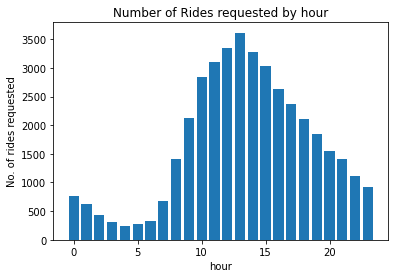

In [0]:

# Your code goes here
from matplotlib import pyplot as plt
# group the rows by hour and count the number of rows in each hour
count_df = df_2021_cleaned.groupBy(hour("request_datetime").alias("hour")).agg(count("*").alias("count"))

# convert the PySpark DataFrame to a Pandas DataFrame for plotting
pandas_df = count_df.toPandas()

# plot the bar chart
plt.bar(pandas_df["hour"], pandas_df["count"])

# add chart title and labels
plt.title("Number of Rides requested by hour")
plt.xlabel("hour")
plt.ylabel("No. of rides requested")

# show the chart
plt.show()


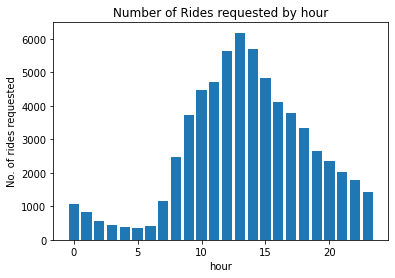

In [0]:
from matplotlib import pyplot as plt
# group the rows by hour and count the number of rows in each hour
count_df = df_2022_cleaned.groupBy(hour("request_datetime").alias("hour")).agg(count("*").alias("count"))

# convert the PySpark DataFrame to a Pandas DataFrame for plotting
pandas_df = count_df.toPandas()

# plot the bar chart
plt.bar(pandas_df["hour"], pandas_df["count"])

# add chart title and labels
plt.title("Number of Rides requested by hour")
plt.xlabel("hour")
plt.ylabel("No. of rides requested")

# show the chart
plt.show()


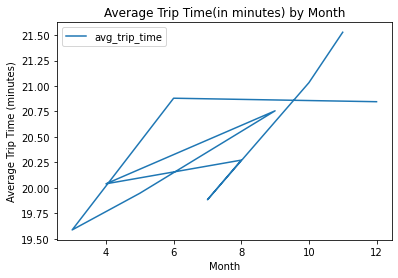

In [0]:
# group the rows by month and calculate the average trip time
avg_time_df = df_2021_cleaned.groupBy(month("request_datetime").alias("month")).agg(avg("trip_time").alias("avg_trip_time"))

# convert the PySpark DataFrame to a Pandas DataFrame for plotting
pandas_df = avg_time_df.toPandas()

pandas_df['avg_trip_time']= (pandas_df['avg_trip_time']/60)

# plot the line graph
ax = pandas_df.plot(x="month", y="avg_trip_time", kind="line")

# set x and y labels
ax.set_xlabel("Month")
ax.set_ylabel("Average Trip Time (minutes)")

# set the plot title
ax.set_title("Average Trip Time(in minutes) by Month")

# show the plot
plt.show()


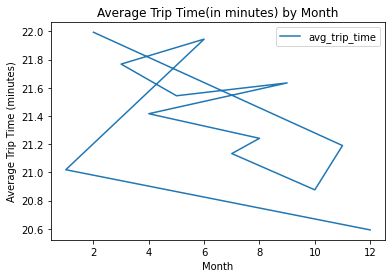

In [0]:
# group the rows by month and calculate the average trip time
avg_time_df = df_2022_cleaned.groupBy(month("request_datetime").alias("month")).agg(avg("trip_time").alias("avg_trip_time"))

# convert the PySpark DataFrame to a Pandas DataFrame for plotting
pandas_df = avg_time_df.toPandas()

pandas_df['avg_trip_time']= (pandas_df['avg_trip_time']/60)

# plot the line graph
ax = pandas_df.plot(x="month", y="avg_trip_time", kind="line")

# set x and y labels
ax.set_xlabel("Month")
ax.set_ylabel("Average Trip Time (minutes)")

# set the plot title
ax.set_title("Average Trip Time(in minutes) by Month")

# show the plot
plt.show()


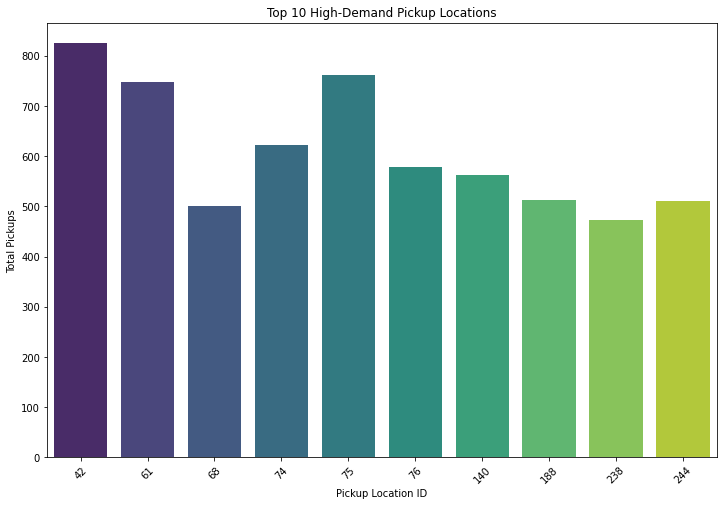

In [0]:
# Identify high-demand pickup locations
demand_analysis = (
    df_2021_cleaned.groupBy("PULocationID")
    .count()
    .withColumnRenamed("count", "total_pickups")
    .orderBy("total_pickups", ascending=False)
)
import matplotlib.pyplot as plt
import seaborn as sns

#PySpark DataFrame is sorted
demand_analysis = demand_analysis.orderBy("total_pickups", ascending=False)

# Convert to Pandas DataFrame and reset the index
demand_analysis_pd = demand_analysis.toPandas().reset_index(drop=True)

# Select the top 10 high-demand pickup locations
top_demand = demand_analysis_pd.head(10)

# Normalize the 'total_pickups' if needed, otherwise skip this step
# top_demand['total_pickups'] = top_demand['total_pickups'] / top_demand['total_pickups'].sum()

# Plotting with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    x='PULocationID', 
    y='total_pickups', 
    data=top_demand,
    palette='viridis'
)

plt.title('Top 10 High-Demand Pickup Locations')
plt.xlabel('Pickup Location ID')
plt.ylabel('Total Pickups')
plt.xticks(rotation=45)
plt.show()


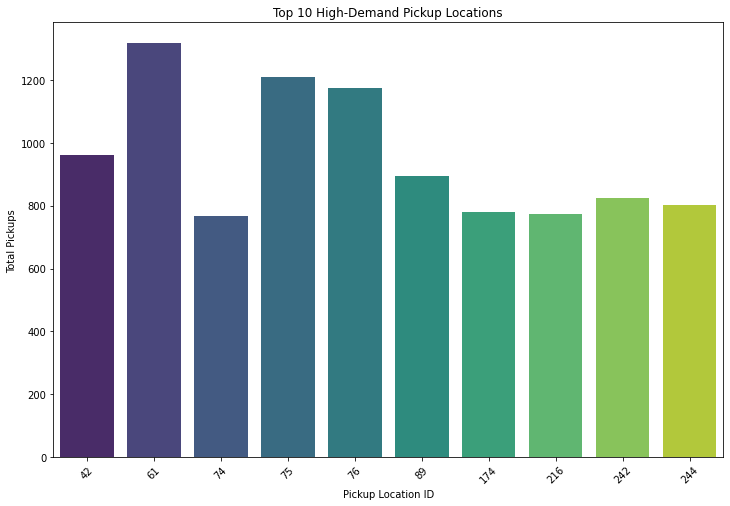

In [0]:
# Identify high-demand pickup locations
demand_analysis = (
    df_2022_cleaned.groupBy("PULocationID")
    .count()
    .withColumnRenamed("count", "total_pickups")
    .orderBy("total_pickups", ascending=False)
)
import matplotlib.pyplot as plt
import seaborn as sns

#PySpark DataFrame is sorted
demand_analysis = demand_analysis.orderBy("total_pickups", ascending=False)

# Convert to Pandas DataFrame and reset the index
demand_analysis_pd = demand_analysis.toPandas().reset_index(drop=True)

# Select the top 10 high-demand pickup locations
top_demand = demand_analysis_pd.head(10)

# Normalize the 'total_pickups' if needed, otherwise skip this step
# top_demand['total_pickups'] = top_demand['total_pickups'] / top_demand['total_pickups'].sum()

# Plotting with seaborn
plt.figure(figsize=(12, 8))
sns.barplot(
    x='PULocationID', 
    y='total_pickups', 
    data=top_demand,
    palette='viridis'
)

plt.title('Top 10 High-Demand Pickup Locations')
plt.xlabel('Pickup Location ID')
plt.ylabel('Total Pickups')
plt.xticks(rotation=45)
plt.show()


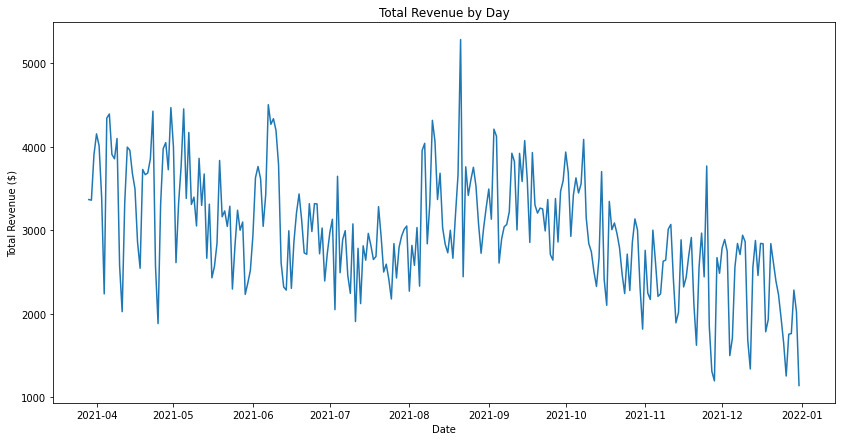

In [0]:
# Ensure df_2021_cleaned is a standalone DataFrame and not a view or copy
#df_2021_cleaned = df_2021_cleaned.copy()

# Convert Pickup_datetime to datetime if it's not already
#df_2021_cleaned['pickup_datetime'] = pd.to_datetime(df_2021_cleaned['pickup_datetime'])

# Create the total_revenue column
#df_2021_cleaned['total_revenue'] = df_2021_cleaned['base_passenger_fare'] + df_2021_cleaned['tips']
df_2021_cleaned = df_2021_cleaned.withColumn('total_revenue',col('base_passenger_fare')+col('tips'))

# Group by date and sum the total revenue
revenue_by_day = df_2021_cleaned.groupBy(F.to_date("Pickup_datetime").alias('date')).agg(F.sum("total_revenue").alias('total_revenue'))

# Convert to Pandas DataFrame for plotting (if you want to use matplotlib)
revenue_by_day_pd = revenue_by_day.toPandas()
revenue_by_day_pd = revenue_by_day_pd.set_index('date')
revenue_by_day_pd = revenue_by_day_pd.sort_index()  # Sorting by date if not already sorted

# Visualization with Pandas and Matplotlib
plt.figure(figsize=(14, 7))
revenue_by_day_pd['total_revenue'].plot(title='Total Revenue by Day')
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.show()


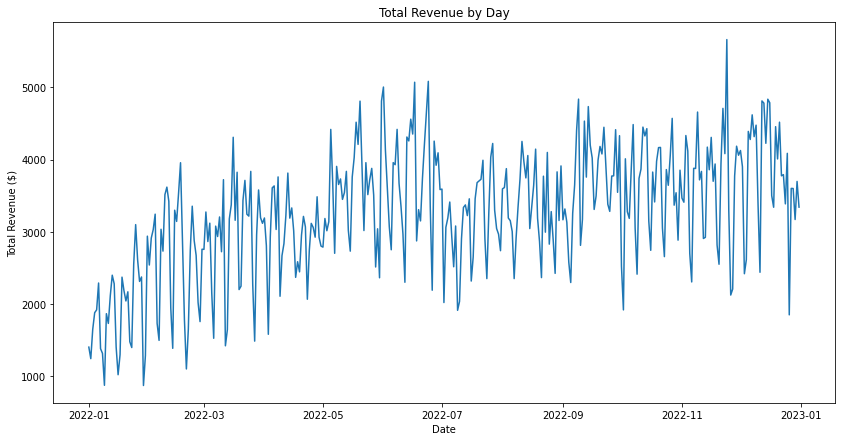

In [0]:
df_2022_cleaned = df_2022_cleaned.withColumn('total_revenue',col('base_passenger_fare')+col('tips'))

# Group by date and sum the total revenue
revenue_by_day = df_2022_cleaned.groupBy(F.to_date("Pickup_datetime").alias('date')).agg(F.sum("total_revenue").alias('total_revenue'))

# Convert to Pandas DataFrame for plotting (if you want to use matplotlib)
revenue_by_day_pd = revenue_by_day.toPandas()
revenue_by_day_pd = revenue_by_day_pd.set_index('date')
revenue_by_day_pd = revenue_by_day_pd.sort_index()  # Sorting by date if not already sorted

# Visualization with Pandas and Matplotlib
plt.figure(figsize=(14, 7))
revenue_by_day_pd['total_revenue'].plot(title='Total Revenue by Day')
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.show()


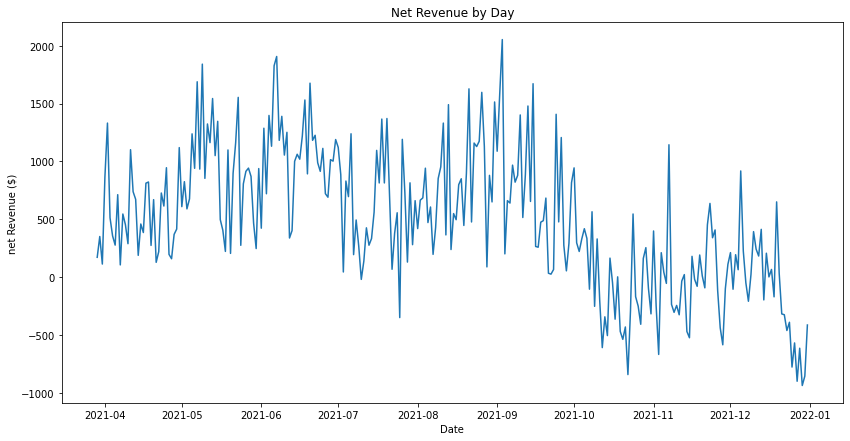

In [0]:
df_2021_cleaned = df_2021_cleaned.withColumn('net_revenue',col('base_passenger_fare')+col('tips')-col('driver_pay'))
# Group by date and sum the total revenue
profit_by_day = df_2021_cleaned.groupBy(F.to_date("Pickup_datetime").alias('date')).agg(F.sum("net_revenue").alias('net_revenue'))
# Convert to Pandas DataFrame for plotting (if you want to use matplotlib)
profit_by_day_pd = profit_by_day.toPandas()
profit_by_day_pd = profit_by_day_pd.set_index('date')
profit_by_day_pd = profit_by_day_pd.sort_index()  # Sorting by date if not already sorted

# Visualization with Pandas and Matplotlib
plt.figure(figsize=(14, 7))
profit_by_day_pd['net_revenue'].plot(title='Net Revenue by Day')
plt.xlabel('Date')
plt.ylabel('net Revenue ($)')
plt.show()

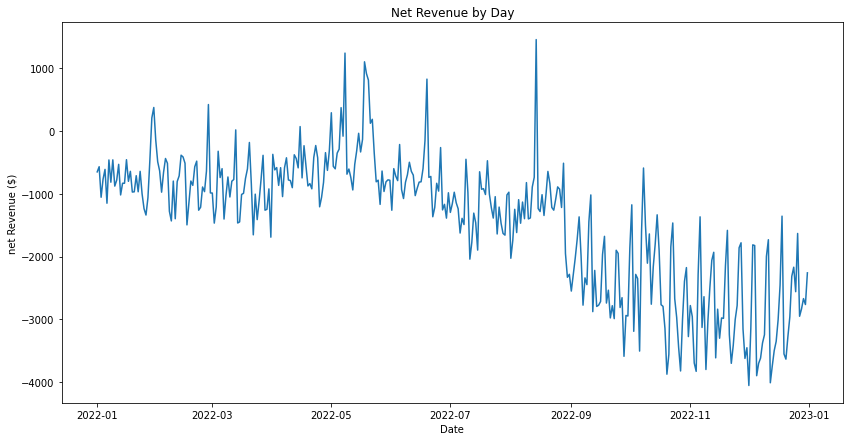

In [0]:
df_2022_cleaned = df_2022_cleaned.withColumn('net_revenue',col('base_passenger_fare')+col('tips')-col('driver_pay'))
# Group by date and sum the total revenue
profit_by_day = df_2022_cleaned.groupBy(F.to_date("Pickup_datetime").alias('date')).agg(F.sum("net_revenue").alias('net_revenue'))
# Convert to Pandas DataFrame for plotting (if you want to use matplotlib)
profit_by_day_pd = profit_by_day.toPandas()
profit_by_day_pd = profit_by_day_pd.set_index('date')
profit_by_day_pd = profit_by_day_pd.sort_index()  # Sorting by date if not already sorted

# Visualization with Pandas and Matplotlib
plt.figure(figsize=(14, 7))
profit_by_day_pd['net_revenue'].plot(title='Net Revenue by Day')
plt.xlabel('Date')
plt.ylabel('net Revenue ($)')
plt.show()

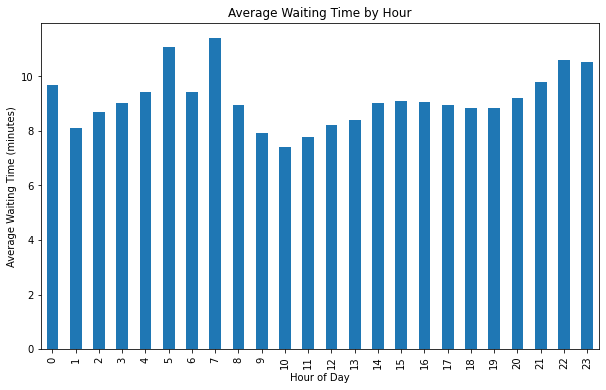

In [0]:
# Convert to timestamp if 'request_datetime' and 'on_scene_datetime' are not already timestamp type
df_2021_cleaned = df_2021_cleaned.withColumn(
    "request_datetime", 
    F.to_timestamp("request_datetime", "yyyy-MM-dd HH:mm:ss")
)
df_2021_cleaned = df_2021_cleaned.withColumn(
    "on_scene_datetime", 
    F.to_timestamp("on_scene_datetime", "yyyy-MM-dd HH:mm:ss")
)

# Calculate waiting time in minutes
df_2021_cleaned = df_2021_cleaned.withColumn(
    "waiting_time", 
    (F.unix_timestamp("on_scene_datetime") - F.unix_timestamp("request_datetime")) / 60
)

# Extract hour from 'request_datetime' for grouping
df_2021_cleaned = df_2021_cleaned.withColumn(
    "hour_of_request", 
    F.hour("request_datetime")
)

# Group by hour and calculate average waiting time
average_waiting_time_by_hour = df_2021_cleaned.groupBy("hour_of_request").agg(
    F.avg("waiting_time").alias("average_waiting_time")
)

# To visualize the data, you would collect the data and use a plotting library like Matplotlib.
# However, PySpark DataFrames cannot be directly plotted using Matplotlib without conversion to a Pandas DataFrame.

# Collect the data into a Pandas DataFrame for plotting
average_waiting_time_by_hour_pd = average_waiting_time_by_hour.toPandas()
average_waiting_time_by_hour_pd = average_waiting_time_by_hour_pd.set_index('hour_of_request')
average_waiting_time_by_hour_pd = average_waiting_time_by_hour_pd.sort_index()

plt.figure(figsize=(10, 6))
average_waiting_time_by_hour_pd['average_waiting_time'].plot(kind='bar', title='Average Waiting Time by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Waiting Time (minutes)')
plt.show()


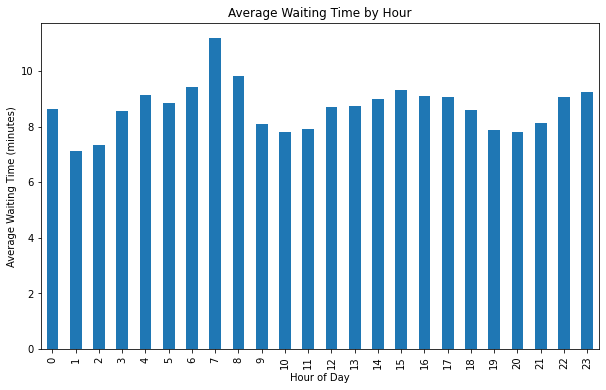

In [0]:
# Convert to timestamp if 'request_datetime' and 'on_scene_datetime' are not already timestamp type
df_2022_cleaned = df_2022_cleaned.withColumn(
    "request_datetime", 
    F.to_timestamp("request_datetime", "yyyy-MM-dd HH:mm:ss")
)
df_2022_cleaned = df_2022_cleaned.withColumn(
    "on_scene_datetime", 
    F.to_timestamp("on_scene_datetime", "yyyy-MM-dd HH:mm:ss")
)

# Calculate waiting time in minutes
df_2022_cleaned = df_2022_cleaned.withColumn(
    "waiting_time", 
    (F.unix_timestamp("on_scene_datetime") - F.unix_timestamp("request_datetime")) / 60
)

# Extract hour from 'request_datetime' for grouping
df_2022_cleaned = df_2022_cleaned.withColumn(
    "hour_of_request", 
    F.hour("request_datetime")
)

# Group by hour and calculate average waiting time
average_waiting_time_by_hour = df_2022_cleaned.groupBy("hour_of_request").agg(
    F.avg("waiting_time").alias("average_waiting_time")
)

# Add a filter to only include rows where the waiting time is non-negative
df_2022_cleaned = df_2022_cleaned.filter(F.col("waiting_time") >= 0)

# Collect the data into a Pandas DataFrame for plotting
average_waiting_time_by_hour_pd = average_waiting_time_by_hour.toPandas()
average_waiting_time_by_hour_pd = average_waiting_time_by_hour_pd.set_index('hour_of_request')
average_waiting_time_by_hour_pd = average_waiting_time_by_hour_pd.sort_index()

plt.figure(figsize=(10, 6))
average_waiting_time_by_hour_pd['average_waiting_time'].plot(kind='bar', title='Average Waiting Time by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Waiting Time (minutes)')
plt.show()